In [226]:
import sys
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
%pylab inline

puidata = os.getenv('PUIDATA')

pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2.csv",skiprows=(0,2))
gdp = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv",skiprows=(0,2))
guns_shootings = pd.read_csv("data-pvLFI.csv")
murders = pd.read_csv("World firearms murders and ownership - Sheet 1.csv")
                  
#pop = pd.read_csv(puidata + "/" + "API_SP.POP.TOTL_DS2_en_csv_v2.csv",skiprows=(0,2))
#gdp = pd.read_csv(puidata + "/" + "API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv",skiprows=(0,2))
#guns_shootings = pd.read_csv(puidata + "/" + "data-pvLFI.csv")
#murders = pd.read_csv(puidata + "/" + "World firearms murders and ownership - Sheet 1.csv")

pop1 = pop[['Country Name','2012']]
pop1 = pop1.rename(columns={'2012': 'pop'})
gdp1 = gdp[['Country Name','2012']]
gdp1 = gdp1.rename(columns={'2012': 'gdp'})

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [227]:
df = pop1.merge(gdp1,on='Country Name')
df = df.merge(murders, right_on="Country/Territory", left_on="Country Name")
df = df.merge(guns_shootings, right_on="Country", left_on="Country Name")
df.head()


,Country Name,pop,gdp,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,22728254.0,1.538194e+12,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4
1,Austria,8429991.0,4.074516e+11,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1
2,Canada,34750545.0,1.824289e+12,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4
3,Switzerland,7996861.0,6.650541e+11,Switzerland,CH,CTS,72.2,57.0,0.77,3.0,45.7,3400000.0,Switzerland,45.7,2
4,Germany,80425823.0,3.543984e+12,Germany,DE,CTS/National police,26.3,158.0,0.19,15.0,30.3,25000000.0,Germany,30.3,7


## exploration
## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


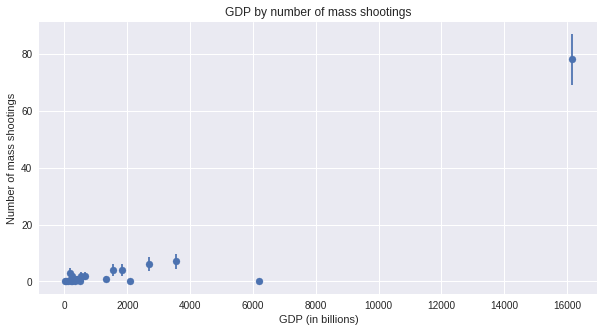

Fig. 1: Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [228]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_title("GDP by number of mass shootings")
ax.set_ylim()
pl.show()
print ("Fig. 1: Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")



## plot the average number of civilian fire arms per person

first without errors, then with errors. are there points that look like outliers?

Text(0.5,1,'Civilian Fire Arms per Person')

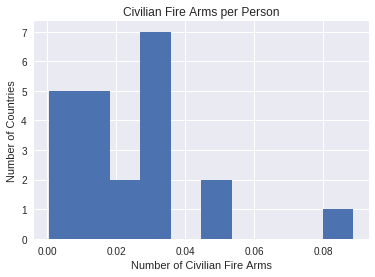

In [229]:
df['shootingspp'] = (df["Number of mass shootings"] / df['pop']) * 1e7
df['firearmspp'] = df["Average firearms per 100 people"] /  1e3
# 1e7 to change order of magnitude
# 1e3 to chance /100 to /1
pl.hist(df['firearmspp'])
pl.xlabel("Number of Civilian Fire Arms")
pl.ylabel("Number of Countries")
pl.title("Civilian Fire Arms per Person")

## Figure: The Average Number of Civilian Fire Arms per Person for Every Country

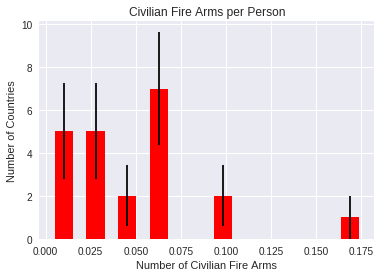

In [230]:
y,binEdges = np.histogram(df['firearmspp'],bins = 10)
bincenters = (binEdges[1:]+binEdges[:-1])
meanstdev = np.sqrt(y)
width = 0.01
plt.bar(bincenters,y,width=width,color='r',yerr=meanstdev)
pl.xlabel("Number of Civilian Fire Arms")
pl.ylabel("Number of Countries")
pl.title("Civilian Fire Arms per Person")
plt.show()

## Figure 2. the Number of Civilian Fire Arms Per Person with errors

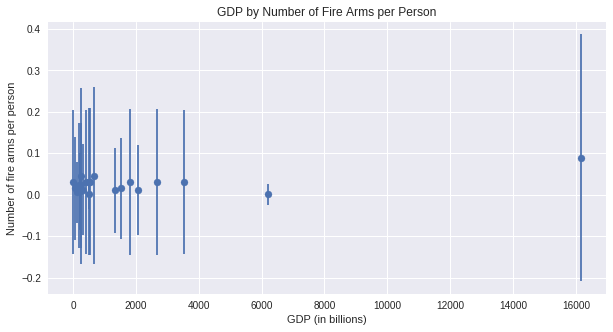

Fig. 2: Number of fire arms vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has both the highest GDP and the highest number of fire arms


In [231]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['firearmspp'])
ax.errorbar(df.gdp / 1e9, df['firearmspp'], 
            yerr = np.sqrt(df['firearmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of fire arms per person")
ax.set_title("GDP by Number of Fire Arms per Person")
ax.set_ylim()
pl.show()
print ("Fig. 2: Number of fire arms vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of fire arms")

## plot the average number of homicide by fire arms per person

first as a histogram

then against the country GDP, with statistical errors. are there points that look like outliers?


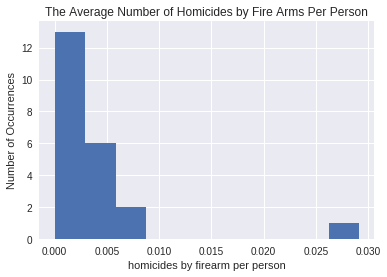

In [232]:
df["homicidespp"] = df['Number of homicides by firearm'] / df['pop'] * 1000

fig, ax = plt.subplots()
ax.hist(df['homicidespp'])
ax.set_xlabel('homicides by firearm per person')
ax.set_ylabel('Number of Occurrences')
ax.set_title('The Average Number of Homicides by Fire Arms Per Person')
plt.show()

## Figure 3: The Distribution of Homicides by Firearm per person


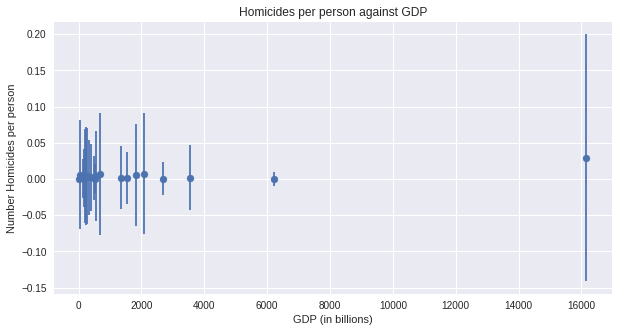

Figure 4: Number of homicides per person vs GDP, errors represent Poisson statistics.
The datapoint to the right of the plot is the USA, which has both the highest GDP and the highest number of fire arms


In [233]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['homicidespp'])
ax.errorbar(df.gdp / 1e9, df['homicidespp'], 
            yerr = np.sqrt(df['homicidespp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number Homicides per person")
ax.set_title("Homicides per person against GDP")
ax.set_ylim()
pl.show()
print ("Figure 4: Number of homicides per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of fire arms")

## plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

with and without errorbars

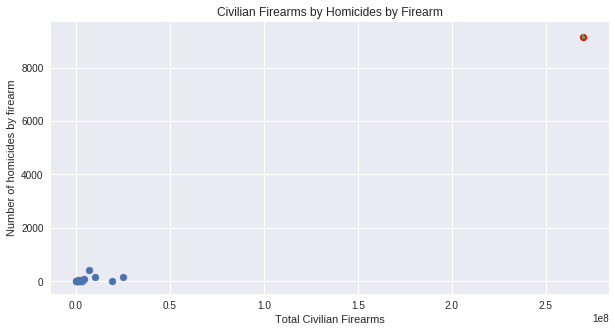

In [234]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatterUS = ax.scatter(df['Average total all civilian firearms'][-1:], df['Number of homicides by firearm'][-1:],color='red')
scatter = ax.scatter(df['Average total all civilian firearms'][:-1], df['Number of homicides by firearm'][:-1])


ax.errorbar(df['Average total all civilian firearms'][:-1], df['Number of homicides by firearm'][:-1], 
            yerr = np.sqrt(df['Number of homicides by firearm'][:-1] * 1.0), fmt = '.')
ax.errorbar(df['Average total all civilian firearms'][-1:], df['Number of homicides by firearm'][-1:], 
            yerr = np.sqrt(df['Number of homicides by firearm'][-1:] * 1.0), fmt = '.')
ax.set_xlabel("Total Civilian Firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_title("Civilian Firearms by Homicides by Firearm")
ax.set_ylim()
pl.show()
## Charlie red

## Figure 5: Each Country's Total Civilian Firearms by Homicides by Firearm (with error bars)

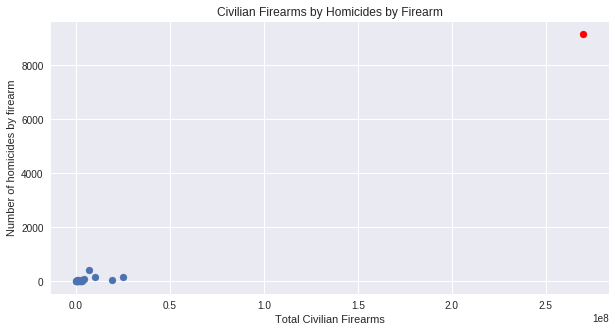

In [235]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatterUS = ax.scatter(df['Average total all civilian firearms'][-1:], df['Number of homicides by firearm'][-1:],color='red')
scatter = ax.scatter(df['Average total all civilian firearms'][:-1], df['Number of homicides by firearm'][:-1])

ax.set_xlabel("Total Civilian Firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_title("Civilian Firearms by Homicides by Firearm")
ax.set_ylim()
pl.show()

## Figure 5: Each Country's Total Civilian Firearms by Homicides by Firearm (without Error Bars)

## plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

with and without errorbars

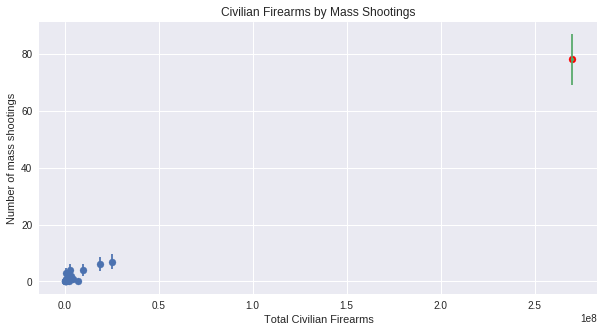

In [236]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatterUS = ax.scatter(df['Average total all civilian firearms'][-1:], df['Number of mass shootings'][-1:],color='red')
scatter = ax.scatter(df['Average total all civilian firearms'][:-1], df['Number of mass shootings'][:-1])


ax.errorbar(df['Average total all civilian firearms'][:-1], df['Number of mass shootings'][:-1], 
            yerr = np.sqrt(df['Number of mass shootings'][:-1] * 1.0), fmt = '.')
ax.errorbar(df['Average total all civilian firearms'][-1:], df['Number of mass shootings'][-1:], 
            yerr = np.sqrt(df['Number of mass shootings'][-1:] * 1.0), fmt = '.')
ax.set_xlabel("Total Civilian Firearms")
ax.set_title("Civilian Firearms by Mass Shootings")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show();

##  Figure 6: Each Country's Total Civilian Firearms by Mass Shootings (with Error Bars)

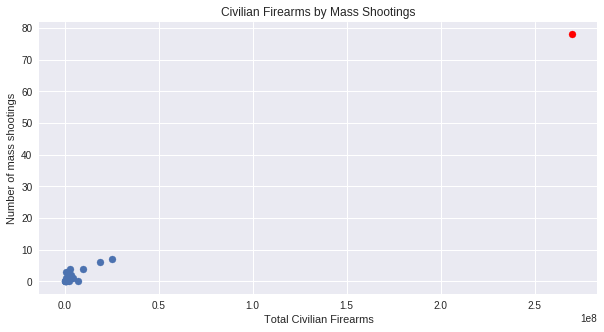

In [237]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatterUS = ax.scatter(df['Average total all civilian firearms'][-1:], df['Number of mass shootings'][-1:],color='red')
scatter = ax.scatter(df['Average total all civilian firearms'][:-1], df['Number of mass shootings'][:-1])

ax.set_xlabel("Total Civilian Firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_title("Civilian Firearms by Mass Shootings")
ax.set_ylim()
pl.show();

## Figure 7: Each Country's Total Civilian Firearms by Mass Shootings (without error bars)

## Modeling
## fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

- statsmodels OLS
- statsmodels WLS
- seaborn
- choose one of
    -- creating a function that calculates the residuals and minimizing that function
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html




WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.

the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function to plot the regression confidence intervals.

import seaborn as sns sns.regplot(x="x", y="y", data=df);

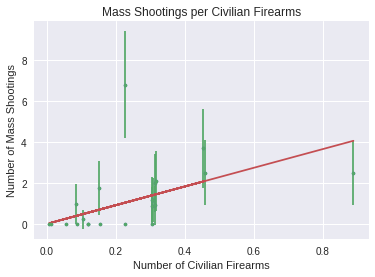

In [238]:
import seaborn as sns 
y = df['shootingspp']
x = (df['firearmspp'] / 1e-1)
OLSmodel = sm.OLS(y,x).fit()

pl.plot(x,y,'.')
yerr = np.abs(y)**0.5
pl.errorbar(x,y,yerr, fmt='.')
pl.plot(x,OLSmodel.fittedvalues,'-')
pl.xlabel("Number of Civilian Firearms")
pl.ylabel("Number of Mass Shootings")
pl.title("Mass Shootings per Civilian Firearms")
pl.show()

## Figure 8: Plotting Mass Shootings and Number of Civilian Fire Arms with OLS Fit 

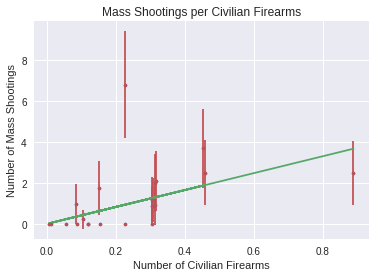

In [239]:
WLSmodel = sm.WLS(endog = y,exog = x,weights = 1/abs(OLSmodel.resid)).fit()

# The weight was chosen by taking the difference between the real and predicted values (residuals). 
# If the difference is larger, the value will be given less weight. 

pl.plot(x,y,'.')
pl.plot(x,WLSmodel.fittedvalues,'-')
pl.errorbar(x,y,yerr, fmt='.')
pl.xlabel("Number of Civilian Firearms")
pl.ylabel("Number of Mass Shootings")
pl.title("Mass Shootings per Civilian Firearms");

## Figure 9: Plotting Mass Shottings and Number of Civilian Fire Arms with WLS Fit 

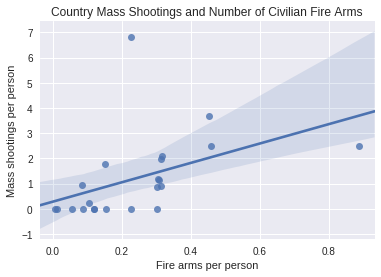

In [240]:
sns.regplot(x,y,data=df)
pl.ylabel("Mass shootings per person")
pl.title("Country Mass Shootings and Number of Civilian Fire Arms")
pl.xlabel("Fire arms per person");

## Figure 10: Plotting Mass Shottings and Number of Civilian Fire Arms with Seaborn

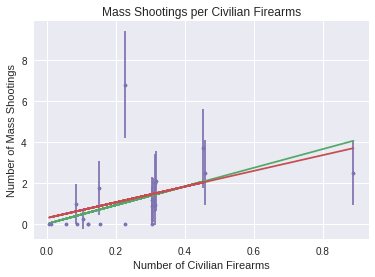

In [241]:
new_polyfit = np.polyfit(x,y,1)
y_fit = (new_polyfit[0] * x) + new_polyfit[1]

pl.plot(x,y,'.')
pl.plot(x,OLSmodel.fittedvalues,'-')
pl.plot(x,y_fit,'-')
pl.errorbar(x,y,yerr, fmt='.')
pl.xlabel("Number of Civilian Firearms")
pl.ylabel("Number of Mass Shootings")
pl.title("Mass Shootings per Civilian Firearms");

## Figure 11: Comparing the OLS (green) fit with the polyfit (red) line

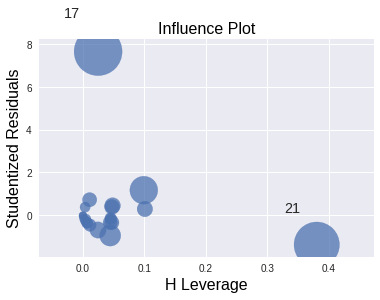

In [242]:
sm.graphics.influence_plot(OLSmodel, criterion="cooks");

## Figure 12: An influence plot of the OLS model 